# Classifying Images of Clothing

## Install and important dependencies

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 686kB 2.8MB/s 


In [3]:
from __future__ import absolute_import, division, print_function

# Import tf and tf datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper lib
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

tf.enable_eager_execution()

1.13.1


## Import Data

In [0]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

### Explore the data

In [10]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print('# of training ex: {}'.format(num_train_examples))
print('# of test ex: {}'.format(num_test_examples))

# of training ex: 60000
# of test ex: 10000


## Process the data

In [0]:
def normalize(img, labels):
  img = tf.cast(img, tf.float32)
  img /= 255
  return img, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

### Explore the processed data

<function matplotlib.pyplot.show>

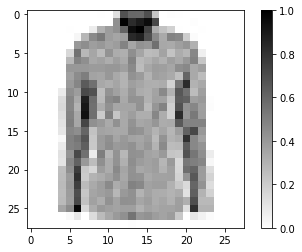

In [12]:
for img, label in test_dataset.take(1):
  break
img = img.numpy().reshape((28,28))

plt.figure()
plt.imshow(img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show

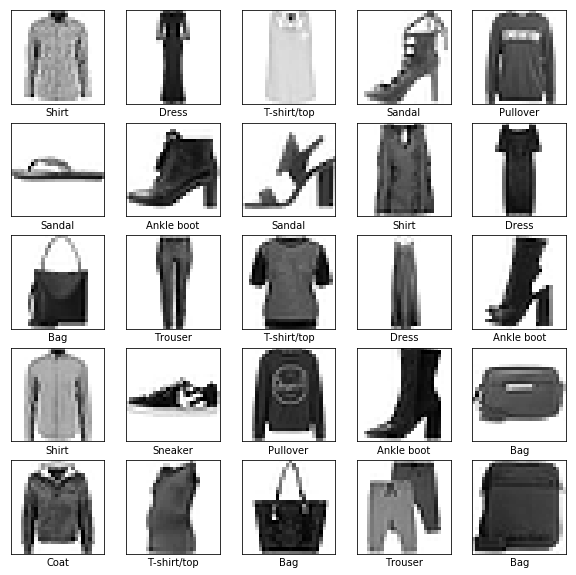

In [14]:
plt.figure(figsize=(10,10))
i = 0
for (img, label) in test_dataset.take(25):
  img = img.numpy().reshape((28,28))
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
  i += 1
plt.show()

## Build model

### Setup the layers

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [0]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training the model

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [18]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4940 - acc: 0.8260
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3759 - acc: 0.8625
Epoch 3/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3363 - acc: 0.8785
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3158 - acc: 0.8827
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2933 - acc: 0.8916


### Evaluate accuracy

In [20]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.3639 - acc: 0.8724
accuracy on test dataset: 0.8724


## Make predictions

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [23]:
predictions.shape

(32, 10)

In [25]:
predictions[0]

array([1.03482336e-04, 2.20688946e-07, 1.49680860e-02, 8.14428859e-05,
       7.24771023e-02, 1.40125195e-07, 9.12361562e-01, 8.05729083e-09,
       7.95924825e-06, 1.00422932e-08], dtype=float32)

In [27]:
np.argmax(predictions[0])

6

In [28]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

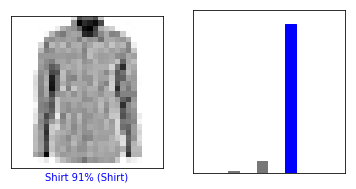

In [30]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

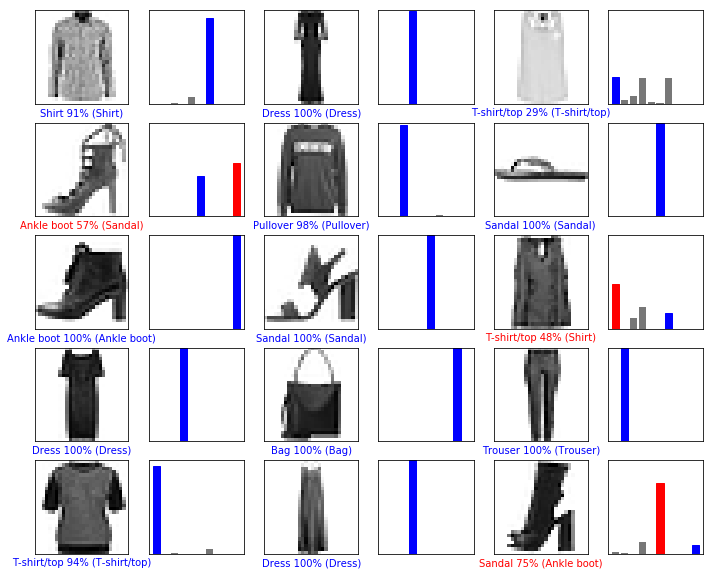

In [31]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
